<a href="https://colab.research.google.com/github/zolfaShefreie/StarsClustering/blob/main/pro3_clustring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('./Stars.csv')
df

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


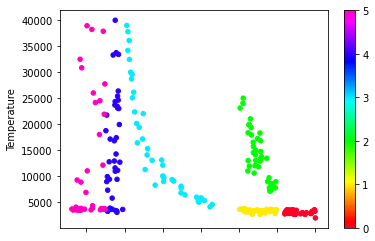

In [ ]:
df.plot.scatter('A_M', 'Temperature', c=df['Type'], colormap='gist_rainbow')

In [ ]:
train_df = df[['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class']]
train_df

,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.1700,16.12,Red,M
1,3042,0.000500,0.1542,16.60,Red,M
2,2600,0.000300,0.1020,18.70,Red,M
3,2800,0.000200,0.1600,16.65,Red,M
4,1939,0.000138,0.1030,20.06,Red,M
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Blue,O
237,8829,537493.000000,1423.0000,-10.73,White,A
238,9235,404940.000000,1112.0000,-11.23,White,A


In [ ]:
train_df['Color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'], dtype=object)

In [ ]:
train_df['Spectral_Class'].unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_df['Color'] = label_encoder.fit_transform(train_df['Color'])
train_df['Spectral_Class'] = label_encoder.fit_transform(train_df['Spectral_Class'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
train_df

,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.1700,16.12,8,5
1,3042,0.000500,0.1542,16.60,8,5
2,2600,0.000300,0.1020,18.70,8,5
3,2800,0.000200,0.1600,16.65,8,5
4,1939,0.000138,0.1030,20.06,8,5
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,0,6
236,30839,834042.000000,1194.0000,-10.63,0,6
237,8829,537493.000000,1423.0000,-10.73,9,0
238,9235,404940.000000,1112.0000,-11.23,9,0


In [ ]:
from sklearn.cluster import KMeans
model = KMeans(6)
model.fit(train_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5, 1,
       1, 4, 5, 1, 1, 1, 1, 1, 1, 2, 4, 1, 4, 5, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 5, 1, 5, 1, 4, 1, 5, 4,
       5, 5, 1, 5, 5, 5, 1, 5, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 4, 1, 1, 5, 5, 1, 4, 4, 4, 5, 2, 4, 1, 5,
       1, 5, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 0, 0, 0, 0,
       1, 4, 4, 2, 1, 1, 2, 3, 4, 3, 4, 1, 2, 3, 3, 4, 3, 2, 4, 4],
      dtype=int32)

In [ ]:
df['pre_type'] = model.labels_
for i in range(6):
  print(df[df['pre_type']==i].mode()['Type'][0], i)
  df.loc[df.pre_type==i, 'pre_type'] = df[df['pre_type']==i].mode()['Type'][0]

0.0 0
4.0 1
5.0 2
4.0 3
4.0 4
5.0 5


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(df['Type'], df['pre_type'])

0.35833333333333334

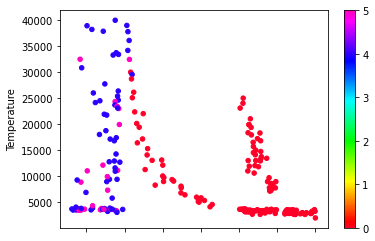

In [ ]:
df.plot.scatter('A_M', 'Temperature', c=df['pre_type'], colormap='gist_rainbow')

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
cluster.fit(train_df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=6)

In [ ]:
df['pre_type'] = cluster.labels_
for i in range(6):
  print(df[df['pre_type']==i].mode()['Type'][0], i)
  df.loc[df.pre_type==i, 'pre_type'] = df[df['pre_type']==i].mode()['Type'][0]

4.0 0
4.0 1
5.0 2
0.0 3
4.0 4
5.0 5


In [ ]:
accuracy_score(df['Type'], df['pre_type'])

0.35

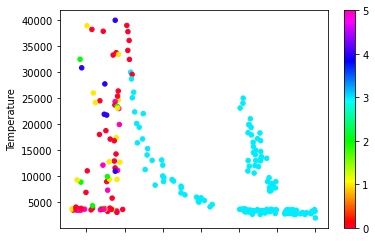

In [ ]:
df.plot.scatter('A_M', 'Temperature', c=cluster.labels_, colormap='gist_rainbow')

preprocess

In [ ]:
train_df = df[['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class']]

In [ ]:
df['Color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'], dtype=object)

In [ ]:
train_df.loc[train_df.Color=='Blue White', 'Color'] = 'Blue-white'
train_df.loc[train_df.Color=='Blue white', 'Color'] = 'Blue-white'
train_df.loc[train_df.Color=='Blue-White', 'Color'] = 'Blue-white'
train_df.loc[train_df.Color=='White-Yellow', 'Color'] = 'yellow-white'
train_df.loc[train_df.Color=='White', 'Color'] = 'white'
train_df.loc[train_df.Color=='yellowish', 'Color'] = 'Yellowish'
train_df['Color'].unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


array(['Red', 'Blue-white', 'white', 'Yellowish White',
       'Pale yellow orange', 'Blue', 'Whitish', 'yellow-white', 'Orange',
       'Yellowish', 'Orange-Red'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_df['Color'] = label_encoder.fit_transform(train_df['Color'])
train_df['Spectral_Class'] = label_encoder.fit_transform(train_df['Spectral_Class'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
scaler = StandardScaler()
train_df = pd.DataFrame(scaler.fit_transform(train_df[train_df.columns]))
normalized_df = normalize(train_df[train_df.columns]) 
normalized_df = pd.DataFrame(normalized_df)
train_df

,0,1,2,3,4,5
0,-0.779382,-0.598624,-0.459210,1.116745,0.507684,0.595338
1,-0.782110,-0.598624,-0.459241,1.162414,0.507684,0.595338
2,-0.828477,-0.598624,-0.459342,1.362213,0.507684,0.595338
3,-0.807496,-0.598624,-0.459229,1.167171,0.507684,0.595338
4,-0.897819,-0.598624,-0.459340,1.491607,0.507684,0.595338
...,...,...,...,...,...,...
235,2.983743,1.494720,2.167974,-1.361718,-1.227988,1.074805
236,2.133913,4.059319,1.854068,-1.428317,-1.227988,1.074805
237,-0.175029,2.403157,2.297800,-1.437832,1.896222,-1.801997
238,-0.132438,1.662878,1.695177,-1.485403,1.896222,-1.801997


In [ ]:
normalized_df

,0,1,2,3,4,5
0,-0.447304,-0.343563,-0.263550,0.640924,0.291371,0.341678
1,-0.441066,-0.337590,-0.258986,0.655537,0.286306,0.335738
2,-0.429343,-0.310225,-0.238045,0.705941,0.263098,0.308523
3,-0.451704,-0.334863,-0.256888,0.652902,0.283993,0.333025
4,-0.437441,-0.291665,-0.223802,0.726750,0.247357,0.290065
...,...,...,...,...,...,...
235,0.661350,0.331307,0.480534,-0.301826,-0.272185,0.238232
236,0.395085,0.751565,0.343272,-0.264447,-0.227357,0.198995
237,-0.039142,0.537417,0.513856,-0.321542,0.424052,-0.402980
238,-0.034536,0.433630,0.442052,-0.387349,0.494479,-0.469908


In [ ]:
# pca = PCA(n_components = 2) 
# X_principal = pca.fit_transform(normalized_df) 
# train_df2 = pd.DataFrame(X_principal)

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=6, max_iter=500)
model.fit(normalized_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
df['pre_type'] = model.labels_
for i in range(6):
  print(df[df['pre_type']==i].mode()['Type'][0], i)
  df.loc[df.pre_type==i, 'pre_type'] = df[df['pre_type']==i].mode()['Type'][0]

2.0 0
5.0 1
2.0 2
0.0 3
4.0 4
5.0 5


In [ ]:
accuracy_score(df['Type'], df['pre_type'])

0.6

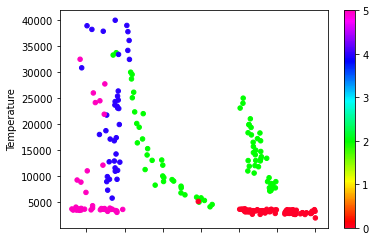

In [ ]:
df.plot.scatter('A_M', 'Temperature', c=df['pre_type'], colormap='gist_rainbow')

In [ ]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(train_df) 
train_df2 = pd.DataFrame(X_principal) 
train_df2

,0,1
0,-1.535978,0.444912
1,-1.561258,0.439554
2,-1.685800,0.433878
3,-1.574058,0.451943
4,-1.782361,0.450499
...,...,...
235,4.056835,-0.111233
236,4.954114,0.746288
237,1.932035,1.825395
238,1.367593,1.387661


In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
cluster.fit(train_df2)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=6)

In [ ]:
df['pre_type'] = cluster.labels_
for i in range(6):
  print(df[df['pre_type']==i].mode()['Type'][0], i)
  df.loc[df.pre_type==i, 'pre_type'] = df[df['pre_type']==i].mode()['Type'][0]

4.0 0
5.0 1
2.0 2
0.0 3
4.0 4
5.0 5


In [ ]:
accuracy_score(df['Type'], df['pre_type'])

0.45